# Regional Diversification and Regional Growth

In this exercise we will explore the relationship between a regions industrial diversification and its employment growth.

We will generally follow the research design of [Pallares, F.J. and R.V. Adkisson (2017) "The impact of industrial diversification on employment growth in the 50 U.S. States: 2000-2013." Economic Development Quarterly 31, 4: 275-284.](https://journals.sagepub.com/doi/full/10.1177/0891242417731599#articleCitationDownloadContainer) However, they examined the relationship using US states as the units of analysis. We are going to shift the focus and look at California counties as the measurement units.

This will give us a chance to deal with the common data problems encountered when doing a realistic policy analysis. In particular, there is a trade-off between increasing spatial resolution, on the one hand, and data availability. In our case we will encounter data suppression issues at the county scale, meaning values will not be reported for all counties and industries. We will address this by first estimating the undisclosed values so that we have a complete data set to use in the subsequent analysis.


## Data Exploration and Estimation

In [1]:
import pandas
%matplotlib inline

In [2]:
ca = pandas.read_csv('CAEMP25N_CA_2001_2017.csv', skipfooter=4)

/home/serge/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
ca.shape

(1947, 25)

In [4]:
ca.head()


,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"""06000""",California,8,CAEMP25N,10,...,Total employment (number of jobs),Number of jobs,19341458,19358164,...,20654292,19837628,19642444,19986021,20666908,21319995,21998371,22688560,23169071,23584800
1,"""06000""",California,8,CAEMP25N,20,...,Wage and salary employment,Number of jobs,15711829,15641543,...,16052090,15151262,14946231,15091751,15713601,16212158,16693308,17184799,17601469,17908517
2,"""06000""",California,8,CAEMP25N,40,...,Proprietors employment,Number of jobs,3629629,3716621,...,4602202,4686366,4696213,4894270,4953307,5107837,5305063,5503761,5567602,5676283
3,"""06000""",California,8,CAEMP25N,50,...,Farm proprietors employment,Number of jobs,81105,76768,...,66821,65844,65373,64615,63286,64457,64081,65251,64615,64937
4,"""06000""",California,8,CAEMP25N,60,...,Nonfarm proprietors employment 2/,Number of jobs,3548524,3639853,...,4535381,4620522,4630840,4829655,4890021,5043380,5240982,5438510,5502987,5611346


In [5]:
ca.tail()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1942,"""06115""","Yuba, CA",8,CAEMP25N,2001,...,Federal civilian,Number of jobs,1289,1321,...,1280,1301,1423,1411,1374,1359,1346,1480,1533,1549
1943,"""06115""","Yuba, CA",8,CAEMP25N,2002,...,Military,Number of jobs,3221,3383,...,3305,3451,3548,3810,4331,4801,4760,4325,4015,3929
1944,"""06115""","Yuba, CA",8,CAEMP25N,2010,...,State and local,Number of jobs,5620,5515,...,5958,5758,5582,5559,5463,4815,4827,4876,4927,5017
1945,"""06115""","Yuba, CA",8,CAEMP25N,2011,...,State government,Number of jobs,1773,1855,...,1773,1731,1704,1628,1610,934,926,933,919,933
1946,"""06115""","Yuba, CA",8,CAEMP25N,2012,...,Local government,Number of jobs,3847,3660,...,4185,4027,3878,3931,3853,3881,3901,3943,4008,4084


In [6]:
names = ca.GeoName.unique()

In [7]:
names.shape

(59,)

In [8]:
names

array(['California', 'Alameda, CA', 'Alpine, CA', 'Amador, CA',
       'Butte, CA', 'Calaveras, CA', 'Colusa, CA', 'Contra Costa, CA',
       'Del Norte, CA', 'El Dorado, CA', 'Fresno, CA', 'Glenn, CA',
       'Humboldt, CA', 'Imperial, CA', 'Inyo, CA', 'Kern, CA',
       'Kings, CA', 'Lake, CA', 'Lassen, CA', 'Los Angeles, CA',
       'Madera, CA', 'Marin, CA', 'Mariposa, CA', 'Mendocino, CA',
       'Merced, CA', 'Modoc, CA', 'Mono, CA', 'Monterey, CA', 'Napa, CA',
       'Nevada, CA', 'Orange, CA', 'Placer, CA', 'Plumas, CA',
       'Riverside, CA', 'Sacramento, CA', 'San Benito, CA',
       'San Bernardino, CA', 'San Diego, CA', 'San Francisco, CA',
       'San Joaquin, CA', 'San Luis Obispo, CA', 'San Mateo, CA',
       'Santa Barbara, CA', 'Santa Clara, CA', 'Santa Cruz, CA',
       'Shasta, CA', 'Sierra, CA', 'Siskiyou, CA', 'Solano, CA',
       'Sonoma, CA', 'Stanislaus, CA', 'Sutter, CA', 'Tehama, CA',
       'Trinity, CA', 'Tulare, CA', 'Tuolumne, CA', 'Ventura, CA',
       '

In [9]:
ca.tail(15)

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1932,"""06115""","Yuba, CA",8,CAEMP25N,1100,53,Real estate and rental and leasing,Number of jobs,406,420,...,648,580,566,563,545,545,565,617,624,640
1933,"""06115""","Yuba, CA",8,CAEMP25N,1200,54,"Professional, scientific, and technical ser...",Number of jobs,949,942,...,1086,857,857,860,860,913,896,991,(D),(D)
1934,"""06115""","Yuba, CA",8,CAEMP25N,1300,55,Management of companies and enterprises,Number of jobs,25,23,...,42,82,81,86,112,104,97,105,(D),(D)
1935,"""06115""","Yuba, CA",8,CAEMP25N,1400,56,Administrative and support and waste manage...,Number of jobs,1047,1128,...,1065,1063,1076,1080,1051,1056,1057,1065,1093,1073
1936,"""06115""","Yuba, CA",8,CAEMP25N,1500,61,Educational services,Number of jobs,94,106,...,(D),(D),(D),128,203,196,219,143,143,158
1937,"""06115""","Yuba, CA",8,CAEMP25N,1600,62,Health care and social assistance,Number of jobs,2166,2254,...,(D),(D),(D),2488,2411,2906,2990,3354,3495,3807
1938,"""06115""","Yuba, CA",8,CAEMP25N,1700,71,"Arts, entertainment, and recreation",Number of jobs,345,350,...,383,375,363,374,367,382,396,430,415,426
1939,"""06115""","Yuba, CA",8,CAEMP25N,1800,72,Accommodation and food services,Number of jobs,1132,1199,...,1192,1088,1066,1152,1241,1356,1382,1395,1497,1478
1940,"""06115""","Yuba, CA",8,CAEMP25N,1900,81,Other services (except government and gover...,Number of jobs,1133,1202,...,1297,1254,1203,1221,1266,1307,1434,1513,1463,1477
1941,"""06115""","Yuba, CA",8,CAEMP25N,2000,...,Government and government enterprises,Number of jobs,10130,10219,...,10543,10510,10553,10780,11168,10975,10933,10681,10475,10495


### Identification of non-disclosed records

In [10]:
ca = ca.replace("(D)",-999) # replaced the non-disclosed records with -999

In [11]:
# convert data type of each year to float from object
import numpy as np
for i in range(8, 25):
    ca.iloc[:,i] = ca.iloc[:,i].astype(np.float)

In [12]:
ca.tail(15)

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1932,"""06115""","Yuba, CA",8,CAEMP25N,1100,53,Real estate and rental and leasing,Number of jobs,406.0,420.0,...,648.0,580.0,566.0,563.0,545.0,545.0,565.0,617.0,624.0,640.0
1933,"""06115""","Yuba, CA",8,CAEMP25N,1200,54,"Professional, scientific, and technical ser...",Number of jobs,949.0,942.0,...,1086.0,857.0,857.0,860.0,860.0,913.0,896.0,991.0,-999.0,-999.0
1934,"""06115""","Yuba, CA",8,CAEMP25N,1300,55,Management of companies and enterprises,Number of jobs,25.0,23.0,...,42.0,82.0,81.0,86.0,112.0,104.0,97.0,105.0,-999.0,-999.0
1935,"""06115""","Yuba, CA",8,CAEMP25N,1400,56,Administrative and support and waste manage...,Number of jobs,1047.0,1128.0,...,1065.0,1063.0,1076.0,1080.0,1051.0,1056.0,1057.0,1065.0,1093.0,1073.0
1936,"""06115""","Yuba, CA",8,CAEMP25N,1500,61,Educational services,Number of jobs,94.0,106.0,...,-999.0,-999.0,-999.0,128.0,203.0,196.0,219.0,143.0,143.0,158.0
1937,"""06115""","Yuba, CA",8,CAEMP25N,1600,62,Health care and social assistance,Number of jobs,2166.0,2254.0,...,-999.0,-999.0,-999.0,2488.0,2411.0,2906.0,2990.0,3354.0,3495.0,3807.0
1938,"""06115""","Yuba, CA",8,CAEMP25N,1700,71,"Arts, entertainment, and recreation",Number of jobs,345.0,350.0,...,383.0,375.0,363.0,374.0,367.0,382.0,396.0,430.0,415.0,426.0
1939,"""06115""","Yuba, CA",8,CAEMP25N,1800,72,Accommodation and food services,Number of jobs,1132.0,1199.0,...,1192.0,1088.0,1066.0,1152.0,1241.0,1356.0,1382.0,1395.0,1497.0,1478.0
1940,"""06115""","Yuba, CA",8,CAEMP25N,1900,81,Other services (except government and gover...,Number of jobs,1133.0,1202.0,...,1297.0,1254.0,1203.0,1221.0,1266.0,1307.0,1434.0,1513.0,1463.0,1477.0
1941,"""06115""","Yuba, CA",8,CAEMP25N,2000,...,Government and government enterprises,Number of jobs,10130.0,10219.0,...,10543.0,10510.0,10553.0,10780.0,11168.0,10975.0,10933.0,10681.0,10475.0,10495.0


In [13]:
state = ca[ca.GeoName=='California']

In [14]:
(state==-999).sum()

GeoFIPS                   0
GeoName                   0
Region                    0
TableName                 0
LineCode                  0
IndustryClassification    0
Description               0
Unit                      0
2001                      0
2002                      0
2003                      0
2004                      0
2005                      0
2006                      0
2007                      0
2008                      0
2009                      0
2010                      0
2011                      0
2012                      0
2013                      0
2014                      0
2015                      0
2016                      0
2017                      0
dtype: int64

In [15]:
# so no missing values at the state level

In [16]:
state.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"""06000""",California,8,CAEMP25N,10,...,Total employment (number of jobs),Number of jobs,19341458.0,19358164.0,...,20654292.0,19837628.0,19642444.0,19986021.0,20666908.0,21319995.0,21998371.0,22688560.0,23169071.0,23584800.0
1,"""06000""",California,8,CAEMP25N,20,...,Wage and salary employment,Number of jobs,15711829.0,15641543.0,...,16052090.0,15151262.0,14946231.0,15091751.0,15713601.0,16212158.0,16693308.0,17184799.0,17601469.0,17908517.0
2,"""06000""",California,8,CAEMP25N,40,...,Proprietors employment,Number of jobs,3629629.0,3716621.0,...,4602202.0,4686366.0,4696213.0,4894270.0,4953307.0,5107837.0,5305063.0,5503761.0,5567602.0,5676283.0
3,"""06000""",California,8,CAEMP25N,50,...,Farm proprietors employment,Number of jobs,81105.0,76768.0,...,66821.0,65844.0,65373.0,64615.0,63286.0,64457.0,64081.0,65251.0,64615.0,64937.0
4,"""06000""",California,8,CAEMP25N,60,...,Nonfarm proprietors employment 2/,Number of jobs,3548524.0,3639853.0,...,4535381.0,4620522.0,4630840.0,4829655.0,4890021.0,5043380.0,5240982.0,5438510.0,5502987.0,5611346.0


In [17]:
state_pct = state.iloc[:,8:] /state.iloc[0,8:] # calculate shares by sector - we will need this later

In [18]:
state_pct.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.812339,0.808008,0.800434,0.792689,0.788499,0.785970,0.777551,0.777179,0.763764,0.760915,0.755115,0.760327,0.760420,0.758843,0.757421,0.759697,0.759325
2,0.187661,0.191992,0.199566,0.207311,0.211501,0.214030,0.222449,0.222821,0.236236,0.239085,0.244885,0.239673,0.239580,0.241157,0.242579,0.240303,0.240675
3,0.004193,0.003966,0.003577,0.003376,0.003266,0.003117,0.003231,0.003235,0.003319,0.003328,0.003233,0.003062,0.003023,0.002913,0.002876,0.002789,0.002753
4,0.183467,0.188027,0.195989,0.203935,0.208235,0.210913,0.219218,0.219585,0.232917,0.235757,0.241652,0.236611,0.236556,0.238244,0.239703,0.237514,0.237922


## Aggregation profile from exercise 01

In [19]:
d1 = [20.0, 40.0]
d2 = [20.0, 50.0, 60.0]
d3 = [70.0, 90.0, 2000.0]
d4 = [70.0]
v = [100.0,
 200.0,
 300.0,
 400.0,
 500.0,
 600.0,
 700.0,
 800.0,
 900.0,
 1000.0,
 1100.0,
 1200.0,
 1300.0,
 1400.0,
 1500.0,
 1600.0,
 1700.0,
 1800.0,
 1900.0]

d4.extend(v)
d4.extend([2001.0, 2002.0, 2011.0, 2012.0])

In [20]:
state.LineCode.dtypes

dtype('int64')

In [21]:
d4 =list(map(int, d4))

In [22]:
d4

[70,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 1600,
 1700,
 1800,
 1900,
 2001,
 2002,
 2011,
 2012]

In [23]:
state4d = state[state.LineCode.isin(d4)]

In [24]:
state4d

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
5,"""06000""",California,8,CAEMP25N,70,111-112,Farm employment,Number of jobs,289915.0,317428.0,...,222843.0,227118.0,232546.0,228094.0,222074.0,230131.0,244302.0,244691.0,241268.0,237065.0
8,"""06000""",California,8,CAEMP25N,100,113-115,"Forestry, fishing, and related activities",Number of jobs,189802.0,190942.0,...,214856.0,200201.0,212034.0,215325.0,223859.0,233738.0,239287.0,241834.0,248913.0,249997.0
9,"""06000""",California,8,CAEMP25N,200,21,"Mining, quarrying, and oil and gas extraction",Number of jobs,38072.0,33442.0,...,54952.0,52328.0,60321.0,54715.0,68875.0,69887.0,64371.0,63461.0,60353.0,60099.0
10,"""06000""",California,8,CAEMP25N,300,22,Utilities,Number of jobs,56349.0,56329.0,...,61690.0,62159.0,59325.0,60102.0,61538.0,61227.0,60187.0,60925.0,64341.0,67673.0
11,"""06000""",California,8,CAEMP25N,400,23,Construction,Number of jobs,1063103.0,1052033.0,...,1120896.0,942684.0,865760.0,867250.0,909050.0,964472.0,1002759.0,1059040.0,1114649.0,1158298.0
12,"""06000""",California,8,CAEMP25N,500,31-33,Manufacturing,Number of jobs,1867740.0,1720515.0,...,1503156.0,1375996.0,1322661.0,1335428.0,1345926.0,1357740.0,1373909.0,1399064.0,1413840.0,1430171.0
13,"""06000""",California,8,CAEMP25N,600,42,Wholesale trade,Number of jobs,727551.0,720933.0,...,789561.0,730479.0,724350.0,745809.0,760592.0,784344.0,842992.0,855336.0,805465.0,805009.0
14,"""06000""",California,8,CAEMP25N,700,44-45,Retail trade,Number of jobs,1953970.0,1968931.0,...,2037623.0,1911535.0,1880146.0,1922312.0,1952868.0,1999529.0,2038735.0,2076207.0,2078293.0,2089996.0
15,"""06000""",California,8,CAEMP25N,800,48-49,Transportation and warehousing,Number of jobs,575285.0,560865.0,...,607133.0,577340.0,567979.0,583608.0,610295.0,642510.0,699446.0,830956.0,942019.0,995167.0
16,"""06000""",California,8,CAEMP25N,900,51,Information,Number of jobs,629281.0,565172.0,...,548042.0,515827.0,508681.0,516531.0,518351.0,534083.0,553447.0,576326.0,613929.0,620677.0


In [25]:
state4d.sum(axis=0)

GeoFIPS                    "06000" "06000" "06000" "06000" "06000" "0600...
GeoName                   CaliforniaCaliforniaCaliforniaCaliforniaCalifo...
Region                                                                  192
TableName                 CAEMP25NCAEMP25NCAEMP25NCAEMP25NCAEMP25NCAEMP2...
LineCode                                                              27096
IndustryClassification    111-112113-11521222331-334244-4548-49515253545...
Description                Farm employment   Forestry, fishing, and rela...
Unit                      Number of jobsNumber of jobsNumber of jobsNumb...
2001                                                            1.93415e+07
2002                                                            1.93582e+07
2003                                                            1.94787e+07
2004                                                            1.97841e+07
2005                                                            2.01269e+07
2006        

In [26]:
state.head(1)

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"""06000""",California,8,CAEMP25N,10,...,Total employment (number of jobs),Number of jobs,19341458.0,19358164.0,...,20654292.0,19837628.0,19642444.0,19986021.0,20666908.0,21319995.0,21998371.0,22688560.0,23169071.0,23584800.0


In [27]:
data = state4d.iloc[:,8:].values.T # pull out employment values

In [28]:
data.shape

(17, 24)

In [29]:
description = list(state4d.Description.values)

In [30]:
state4d = pandas.DataFrame(data=data, columns=description, index=range(2001,2018))

In [31]:
data.shape

(17, 24)

In [32]:
description

[' Farm employment',
 '   Forestry, fishing, and related activities',
 '   Mining, quarrying, and oil and gas extraction',
 '   Utilities',
 '   Construction',
 '   Manufacturing',
 '   Wholesale trade',
 '   Retail trade',
 '   Transportation and warehousing',
 '   Information',
 '   Finance and insurance',
 '   Real estate and rental and leasing',
 '   Professional, scientific, and technical services',
 '   Management of companies and enterprises',
 '   Administrative and support and waste management and remediation services',
 '   Educational services',
 '   Health care and social assistance',
 '   Arts, entertainment, and recreation',
 '   Accommodation and food services',
 '   Other services (except government and government enterprises)',
 '   Federal civilian',
 '   Military',
 '    State government',
 '    Local government']

In [33]:
state4d.head()

,Farm employment,"Forestry, fishing, and related activities","Mining, quarrying, and oil and gas extraction",Utilities,Construction,Manufacturing,Wholesale trade,Retail trade,Transportation and warehousing,Information,...,Administrative and support and waste management and remediation services,Educational services,Health care and social assistance,"Arts, entertainment, and recreation",Accommodation and food services,Other services (except government and government enterprises),Federal civilian,Military,State government,Local government
2001,289915.0,189802.0,38072.0,56349.0,1063103.0,1867740.0,727551.0,1953970.0,575285.0,629281.0,...,1232385.0,322201.0,1512062.0,458153.0,1247477.0,1122542.0,246317.0,225231.0,466533.0,1676075.0
2002,317428.0,190942.0,33442.0,56329.0,1052033.0,1720515.0,720933.0,1968931.0,560865.0,565172.0,...,1235718.0,346573.0,1567445.0,472666.0,1256823.0,1168624.0,254162.0,230271.0,478292.0,1726314.0
2003,310619.0,191150.0,35915.0,56949.0,1087203.0,1615130.0,721060.0,1995437.0,554065.0,548560.0,...,1251560.0,358259.0,1617216.0,477478.0,1281745.0,1177177.0,256271.0,235850.0,478779.0,1707633.0
2004,277366.0,190783.0,34381.0,57734.0,1167793.0,1601392.0,735224.0,2022383.0,564656.0,562379.0,...,1279978.0,367152.0,1636386.0,487625.0,1312586.0,1196969.0,251158.0,233115.0,471732.0,1695749.0
2005,244370.0,200827.0,36328.0,57637.0,1248701.0,1582808.0,761232.0,2069899.0,582212.0,558536.0,...,1285112.0,380037.0,1643016.0,494137.0,1345223.0,1208501.0,250521.0,223452.0,466231.0,1710063.0


## Changing industry labels to something more useable

In [34]:
description = [ d.strip().split()[0].replace(",","") for d in description]

In [35]:
description

['Farm',
 'Forestry',
 'Mining',
 'Utilities',
 'Construction',
 'Manufacturing',
 'Wholesale',
 'Retail',
 'Transportation',
 'Information',
 'Finance',
 'Real',
 'Professional',
 'Management',
 'Administrative',
 'Educational',
 'Health',
 'Arts',
 'Accommodation',
 'Other',
 'Federal',
 'Military',
 'State',
 'Local']

In [36]:
state4d.columns = description
state4d.head()

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Administrative,Educational,Health,Arts,Accommodation,Other,Federal,Military,State,Local
2001,289915.0,189802.0,38072.0,56349.0,1063103.0,1867740.0,727551.0,1953970.0,575285.0,629281.0,...,1232385.0,322201.0,1512062.0,458153.0,1247477.0,1122542.0,246317.0,225231.0,466533.0,1676075.0
2002,317428.0,190942.0,33442.0,56329.0,1052033.0,1720515.0,720933.0,1968931.0,560865.0,565172.0,...,1235718.0,346573.0,1567445.0,472666.0,1256823.0,1168624.0,254162.0,230271.0,478292.0,1726314.0
2003,310619.0,191150.0,35915.0,56949.0,1087203.0,1615130.0,721060.0,1995437.0,554065.0,548560.0,...,1251560.0,358259.0,1617216.0,477478.0,1281745.0,1177177.0,256271.0,235850.0,478779.0,1707633.0
2004,277366.0,190783.0,34381.0,57734.0,1167793.0,1601392.0,735224.0,2022383.0,564656.0,562379.0,...,1279978.0,367152.0,1636386.0,487625.0,1312586.0,1196969.0,251158.0,233115.0,471732.0,1695749.0
2005,244370.0,200827.0,36328.0,57637.0,1248701.0,1582808.0,761232.0,2069899.0,582212.0,558536.0,...,1285112.0,380037.0,1643016.0,494137.0,1345223.0,1208501.0,250521.0,223452.0,466231.0,1710063.0


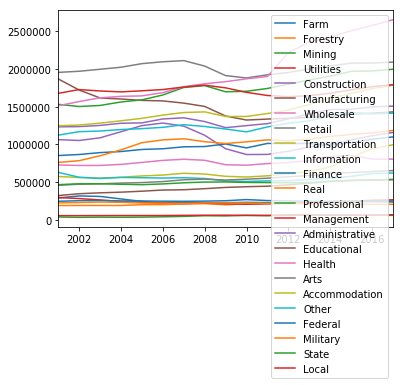

In [37]:
state4d.plot()

### Move labels off the plot

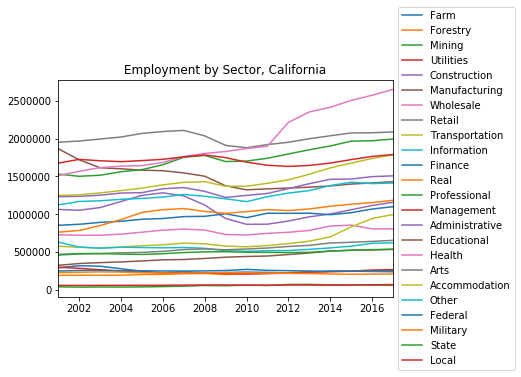

In [38]:
import matplotlib.pyplot as plt
f = plt.figure()

plt.title('Employment by Sector, California', color='black')
state4d.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

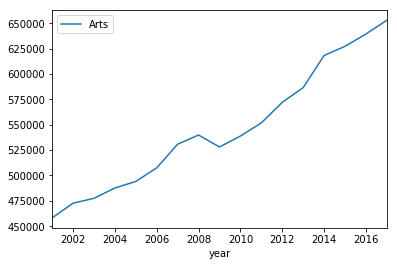

In [39]:
state4d['year'] = range(2001, 2018)
state4d.plot(x='year', y='Arts')

In [40]:
state4d['Total'] = state.iloc[0,8:].values

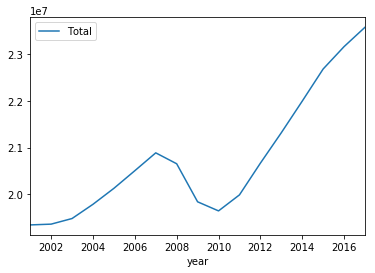

In [41]:
state4d.plot(x='year', y='Total') # impact of recession

## By County

In [42]:
names

array(['California', 'Alameda, CA', 'Alpine, CA', 'Amador, CA',
       'Butte, CA', 'Calaveras, CA', 'Colusa, CA', 'Contra Costa, CA',
       'Del Norte, CA', 'El Dorado, CA', 'Fresno, CA', 'Glenn, CA',
       'Humboldt, CA', 'Imperial, CA', 'Inyo, CA', 'Kern, CA',
       'Kings, CA', 'Lake, CA', 'Lassen, CA', 'Los Angeles, CA',
       'Madera, CA', 'Marin, CA', 'Mariposa, CA', 'Mendocino, CA',
       'Merced, CA', 'Modoc, CA', 'Mono, CA', 'Monterey, CA', 'Napa, CA',
       'Nevada, CA', 'Orange, CA', 'Placer, CA', 'Plumas, CA',
       'Riverside, CA', 'Sacramento, CA', 'San Benito, CA',
       'San Bernardino, CA', 'San Diego, CA', 'San Francisco, CA',
       'San Joaquin, CA', 'San Luis Obispo, CA', 'San Mateo, CA',
       'Santa Barbara, CA', 'Santa Clara, CA', 'Santa Cruz, CA',
       'Shasta, CA', 'Sierra, CA', 'Siskiyou, CA', 'Solano, CA',
       'Sonoma, CA', 'Stanislaus, CA', 'Sutter, CA', 'Tehama, CA',
       'Trinity, CA', 'Tulare, CA', 'Tuolumne, CA', 'Ventura, CA',
       '

In [43]:
county_dfs = {} # create a dictionary to store all the county dataframes
for county in names[1:]:
    county_df = ca[ca.GeoName==county]
    county_4d_df = county_df[county_df.LineCode.isin(d4)]
    data = county_4d_df.iloc[:,8:].values.T
    county_4d_df = pandas.DataFrame(data=data, index=range(2001,2018), columns=description)
    county_4d_df['county'] = county
    county_4d_df['Total'] = county_df.iloc[0,8:].values
    county_dfs[county] = county_4d_df


In [44]:
county_4d_df

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Health,Arts,Accommodation,Other,Federal,Military,State,Local,county,Total
2001,1992.0,522.0,103.0,-999.0,1407.0,1285.0,-999.0,1985.0,501.0,243.0,...,2166.0,345.0,1132.0,1133.0,1289.0,3221.0,1773.0,3847.0,"Yuba, CA",26355
2002,1929.0,508.0,89.0,-999.0,1199.0,1349.0,-999.0,2062.0,506.0,186.0,...,2254.0,350.0,1199.0,1202.0,1321.0,3383.0,1855.0,3660.0,"Yuba, CA",26614
2003,1828.0,443.0,93.0,-999.0,1354.0,1367.0,-999.0,1889.0,552.0,183.0,...,2221.0,294.0,1196.0,1207.0,1296.0,3407.0,1763.0,3634.0,"Yuba, CA",26002
2004,1735.0,506.0,89.0,-999.0,1631.0,1381.0,-999.0,2104.0,568.0,252.0,...,2112.0,297.0,1242.0,1230.0,1376.0,3526.0,1660.0,3947.0,"Yuba, CA",27171
2005,1424.0,474.0,99.0,-999.0,1646.0,1100.0,-999.0,2243.0,671.0,268.0,...,2195.0,324.0,1253.0,1250.0,1411.0,3448.0,1631.0,3969.0,"Yuba, CA",27364
2006,1328.0,456.0,113.0,-999.0,1732.0,956.0,-999.0,2285.0,658.0,287.0,...,-999.0,375.0,1290.0,1297.0,1373.0,3425.0,1769.0,3962.0,"Yuba, CA",27540
2007,1453.0,474.0,172.0,-999.0,1562.0,1002.0,-999.0,2196.0,643.0,281.0,...,2489.0,367.0,1239.0,1343.0,1348.0,3294.0,1809.0,4108.0,"Yuba, CA",27906
2008,1307.0,424.0,201.0,-999.0,1411.0,784.0,-999.0,2065.0,620.0,295.0,...,-999.0,383.0,1192.0,1297.0,1280.0,3305.0,1773.0,4185.0,"Yuba, CA",27011
2009,1271.0,389.0,160.0,-999.0,1172.0,637.0,-999.0,1952.0,603.0,282.0,...,-999.0,375.0,1088.0,1254.0,1301.0,3451.0,1731.0,4027.0,"Yuba, CA",25911
2010,1257.0,427.0,177.0,-999.0,1066.0,605.0,-999.0,1896.0,567.0,275.0,...,-999.0,363.0,1066.0,1203.0,1423.0,3548.0,1704.0,3878.0,"Yuba, CA",25657


In [45]:
county

'Yuba, CA'

In [46]:
(county_4d_df==-999).sum()

Farm               0
Forestry           0
Mining             0
Utilities         17
Construction       0
Manufacturing      0
Wholesale         17
Retail             0
Transportation     0
Information        0
Finance            0
Real               0
Professional       2
Management         6
Administrative     4
Educational        4
Health             4
Arts               0
Accommodation      0
Other              0
Federal            0
Military           0
State              0
Local              0
county             0
Total              0
dtype: int64

## Dealing with Undisclosed Values

Note in the last county, the `-999` values in the Utilities and Wholesale sectors. 
These values are not disclosed to protect confidentiality. However, the reported totals for the county employment do include these values.

One way to estimate the undisclosed value is as follows:

1. Define $s_{i,r,t} = e_{i,r,t} / e_{r,t}$ as the share of total regional employment in region $r$ that is in industry $i$ in time period $t$.
2. Calculate the amount of undisclosed employment: $U_{r,t} = e_{r,t} - \sum_{i} e_{i,r,t}$, setting $e_{i,r,t}=0$ for sectors that are not disclosed.
3. Define $J$ as the number of sectors that are undisclosed  in the region.
4. Assume $p_{j,r,t} = s_{j,t} / \sum_{j} s_{j,t}$ where $s_{j,t}$ is the share of state employment in sector $j$ in time period $t$.
5. Estimate employment with $\hat{e}_{j,r,t} = p_{j,r,t} \times U_{r,t}$ for each sector that is undisclosed in region $r$ and time period $t$.

## Get $s_{i,t}$ values for the state

In [47]:
state_pc = state4d.iloc[:,:-2].divide(state4d.Total,axis=0)

In [48]:
state_pc

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Administrative,Educational,Health,Arts,Accommodation,Other,Federal,Military,State,Local
2001,0.0149893,0.00981322,0.00196841,0.00291338,0.054965,0.0965667,0.0376161,0.101025,0.0297436,0.0325353,...,0.0637173,0.0166586,0.0781773,0.0236876,0.0644976,0.0580381,0.0127352,0.011645,0.0241209,0.0866571
2002,0.0163976,0.00986364,0.00172754,0.00290983,0.0543457,0.088878,0.0372418,0.101711,0.028973,0.0291955,...,0.0638345,0.0179032,0.0809707,0.0244169,0.0649247,0.0603685,0.0131294,0.0118953,0.0247075,0.0891776
2003,0.0159466,0.0098133,0.00184381,0.00292366,0.0558151,0.0829179,0.0370179,0.102442,0.0284447,0.0281621,...,0.0642528,0.0183924,0.083025,0.0245129,0.0658025,0.0604342,0.0131565,0.0121081,0.0245797,0.0876668
2004,0.0140196,0.00964323,0.00173781,0.0029182,0.0590267,0.0809432,0.0371623,0.102222,0.0285408,0.0284257,...,0.0646972,0.0185579,0.082712,0.0246473,0.0663453,0.0605014,0.0126949,0.0117829,0.0238439,0.0857125
2005,0.0121415,0.00997805,0.00180495,0.00286368,0.0620415,0.0786415,0.0378217,0.102843,0.0289271,0.0277508,...,0.0638505,0.0188821,0.0816329,0.0245511,0.0668371,0.0600441,0.0124471,0.0111022,0.0231646,0.0849642
2006,0.0108699,0.00985346,0.00198199,0.00283499,0.0625823,0.0768685,0.038438,0.102154,0.0289563,0.0270209,...,0.0652058,0.0192849,0.0822006,0.0247516,0.0676995,0.0597956,0.0120722,0.0107953,0.0232342,0.084214
2007,0.0112687,0.0100611,0.00220275,0.00288567,0.0594542,0.0740574,0.0384522,0.10101,0.0295605,0.0267409,...,0.0647388,0.0191107,0.0844535,0.0254136,0.0680862,0.0603616,0.0117924,0.0104328,0.0235261,0.0842629
2008,0.0107892,0.0104025,0.00266056,0.00298679,0.0542694,0.0727769,0.0382275,0.0986537,0.029395,0.026534,...,0.0630726,0.0200196,0.0873219,0.0261419,0.0692743,0.0599129,0.0120267,0.0108189,0.0242497,0.086402
2009,0.0114488,0.010092,0.00263782,0.00313339,0.04752,0.0693629,0.0368229,0.0963591,0.0291033,0.0260025,...,0.0615852,0.0216713,0.0923073,0.0266223,0.0690632,0.0606767,0.0127772,0.01132,0.0253173,0.08818
2010,0.011839,0.0107947,0.00307095,0.00302025,0.044076,0.0673369,0.0368768,0.0957185,0.0289159,0.025897,...,0.0635668,0.0223765,0.0951463,0.0274372,0.0697461,0.0593815,0.0136975,0.0113954,0.0252593,0.085994


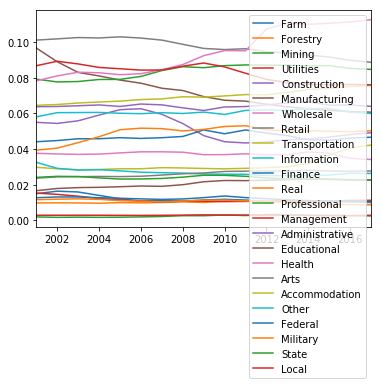

In [49]:
state_pc.plot()

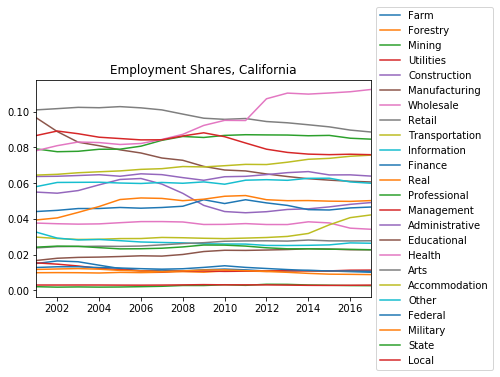

In [50]:
import matplotlib.pyplot as plt
f = plt.figure()

plt.title('Employment Shares, California', color='black')
state_pc.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [51]:
# use last county df to test, then put into loop


In [52]:
county_4d_df.head()

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Health,Arts,Accommodation,Other,Federal,Military,State,Local,county,Total
2001,1992.0,522.0,103.0,-999.0,1407.0,1285.0,-999.0,1985.0,501.0,243.0,...,2166.0,345.0,1132.0,1133.0,1289.0,3221.0,1773.0,3847.0,"Yuba, CA",26355
2002,1929.0,508.0,89.0,-999.0,1199.0,1349.0,-999.0,2062.0,506.0,186.0,...,2254.0,350.0,1199.0,1202.0,1321.0,3383.0,1855.0,3660.0,"Yuba, CA",26614
2003,1828.0,443.0,93.0,-999.0,1354.0,1367.0,-999.0,1889.0,552.0,183.0,...,2221.0,294.0,1196.0,1207.0,1296.0,3407.0,1763.0,3634.0,"Yuba, CA",26002
2004,1735.0,506.0,89.0,-999.0,1631.0,1381.0,-999.0,2104.0,568.0,252.0,...,2112.0,297.0,1242.0,1230.0,1376.0,3526.0,1660.0,3947.0,"Yuba, CA",27171
2005,1424.0,474.0,99.0,-999.0,1646.0,1100.0,-999.0,2243.0,671.0,268.0,...,2195.0,324.0,1253.0,1250.0,1411.0,3448.0,1631.0,3969.0,"Yuba, CA",27364


In [53]:
county_4d_df.head()

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Health,Arts,Accommodation,Other,Federal,Military,State,Local,county,Total
2001,1992.0,522.0,103.0,-999.0,1407.0,1285.0,-999.0,1985.0,501.0,243.0,...,2166.0,345.0,1132.0,1133.0,1289.0,3221.0,1773.0,3847.0,"Yuba, CA",26355
2002,1929.0,508.0,89.0,-999.0,1199.0,1349.0,-999.0,2062.0,506.0,186.0,...,2254.0,350.0,1199.0,1202.0,1321.0,3383.0,1855.0,3660.0,"Yuba, CA",26614
2003,1828.0,443.0,93.0,-999.0,1354.0,1367.0,-999.0,1889.0,552.0,183.0,...,2221.0,294.0,1196.0,1207.0,1296.0,3407.0,1763.0,3634.0,"Yuba, CA",26002
2004,1735.0,506.0,89.0,-999.0,1631.0,1381.0,-999.0,2104.0,568.0,252.0,...,2112.0,297.0,1242.0,1230.0,1376.0,3526.0,1660.0,3947.0,"Yuba, CA",27171
2005,1424.0,474.0,99.0,-999.0,1646.0,1100.0,-999.0,2243.0,671.0,268.0,...,2195.0,324.0,1253.0,1250.0,1411.0,3448.0,1631.0,3969.0,"Yuba, CA",27364


In [54]:
description
    

['Farm',
 'Forestry',
 'Mining',
 'Utilities',
 'Construction',
 'Manufacturing',
 'Wholesale',
 'Retail',
 'Transportation',
 'Information',
 'Finance',
 'Real',
 'Professional',
 'Management',
 'Administrative',
 'Educational',
 'Health',
 'Arts',
 'Accommodation',
 'Other',
 'Federal',
 'Military',
 'State',
 'Local']

In [55]:
v = county_4d_df[description] # make life easy and select only the employment columns
v.iloc[0,:]==-999

Farm              False
Forestry          False
Mining            False
Utilities          True
Construction      False
Manufacturing     False
Wholesale          True
Retail            False
Transportation    False
Information       False
Finance           False
Real              False
Professional      False
Management        False
Administrative    False
Educational       False
Health            False
Arts              False
Accommodation     False
Other             False
Federal           False
Military          False
State             False
Local             False
Name: 2001, dtype: bool

In [56]:
state_pc[description]

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Administrative,Educational,Health,Arts,Accommodation,Other,Federal,Military,State,Local
2001,0.0149893,0.00981322,0.00196841,0.00291338,0.054965,0.0965667,0.0376161,0.101025,0.0297436,0.0325353,...,0.0637173,0.0166586,0.0781773,0.0236876,0.0644976,0.0580381,0.0127352,0.011645,0.0241209,0.0866571
2002,0.0163976,0.00986364,0.00172754,0.00290983,0.0543457,0.088878,0.0372418,0.101711,0.028973,0.0291955,...,0.0638345,0.0179032,0.0809707,0.0244169,0.0649247,0.0603685,0.0131294,0.0118953,0.0247075,0.0891776
2003,0.0159466,0.0098133,0.00184381,0.00292366,0.0558151,0.0829179,0.0370179,0.102442,0.0284447,0.0281621,...,0.0642528,0.0183924,0.083025,0.0245129,0.0658025,0.0604342,0.0131565,0.0121081,0.0245797,0.0876668
2004,0.0140196,0.00964323,0.00173781,0.0029182,0.0590267,0.0809432,0.0371623,0.102222,0.0285408,0.0284257,...,0.0646972,0.0185579,0.082712,0.0246473,0.0663453,0.0605014,0.0126949,0.0117829,0.0238439,0.0857125
2005,0.0121415,0.00997805,0.00180495,0.00286368,0.0620415,0.0786415,0.0378217,0.102843,0.0289271,0.0277508,...,0.0638505,0.0188821,0.0816329,0.0245511,0.0668371,0.0600441,0.0124471,0.0111022,0.0231646,0.0849642
2006,0.0108699,0.00985346,0.00198199,0.00283499,0.0625823,0.0768685,0.038438,0.102154,0.0289563,0.0270209,...,0.0652058,0.0192849,0.0822006,0.0247516,0.0676995,0.0597956,0.0120722,0.0107953,0.0232342,0.084214
2007,0.0112687,0.0100611,0.00220275,0.00288567,0.0594542,0.0740574,0.0384522,0.10101,0.0295605,0.0267409,...,0.0647388,0.0191107,0.0844535,0.0254136,0.0680862,0.0603616,0.0117924,0.0104328,0.0235261,0.0842629
2008,0.0107892,0.0104025,0.00266056,0.00298679,0.0542694,0.0727769,0.0382275,0.0986537,0.029395,0.026534,...,0.0630726,0.0200196,0.0873219,0.0261419,0.0692743,0.0599129,0.0120267,0.0108189,0.0242497,0.086402
2009,0.0114488,0.010092,0.00263782,0.00313339,0.04752,0.0693629,0.0368229,0.0963591,0.0291033,0.0260025,...,0.0615852,0.0216713,0.0923073,0.0266223,0.0690632,0.0606767,0.0127772,0.01132,0.0253173,0.08818
2010,0.011839,0.0107947,0.00307095,0.00302025,0.044076,0.0673369,0.0368768,0.0957185,0.0289159,0.025897,...,0.0635668,0.0223765,0.0951463,0.0274372,0.0697461,0.0593815,0.0136975,0.0113954,0.0252593,0.085994


In [57]:
# mask based on missing
missing_mask = v==-999
v[~missing_mask].sum(axis=1) #reported total

2001    25897.0
2002    26101.0
2003    24726.0
2004    25861.0
2005    25925.0
2006    23684.0
2007    27375.0
2008    23811.0
2009    22787.0
2010    22559.0
2011    25381.0
2012    25932.0
2013    26505.0
2014    26798.0
2015    27374.0
2016    26393.0
2017    27089.0
dtype: float64

In [58]:
reported = v[~missing_mask].sum(axis=1) 

In [59]:
total = county_4d_df['Total']
total

2001    26355
2002    26614
2003    26002
2004    27171
2005    27364
2006    27540
2007    27906
2008    27011
2009    25911
2010    25657
2011    25851
2012    26456
2013    27056
2014    27394
2015    27937
2016    28038
2017    28711
Name: Total, dtype: object

In [60]:
toallocate = total - reported
toallocate

2001     458
2002     513
2003    1276
2004    1310
2005    1439
2006    3856
2007     531
2008    3200
2009    3124
2010    3098
2011     470
2012     524
2013     551
2014     596
2015     563
2016    1645
2017    1622
dtype: object

In [61]:
toallocate.shape 

(17,)

In [62]:
(county_4d_df==-999).sum()

Farm               0
Forestry           0
Mining             0
Utilities         17
Construction       0
Manufacturing      0
Wholesale         17
Retail             0
Transportation     0
Information        0
Finance            0
Real               0
Professional       2
Management         6
Administrative     4
Educational        4
Health             4
Arts               0
Accommodation      0
Other              0
Federal            0
Military           0
State              0
Local              0
county             0
Total              0
dtype: int64

In [63]:
reported = county_4d_df.loc[:,description].values.astype('float')
reported.shape

(17, 24)

In [64]:
pc = state_pc[description]
pc.shape

(17, 24)

In [65]:
reported.shape

(17, 24)

In [66]:
total = county_4d_df['Total'].values

In [67]:
total 

array([26355.0, 26614.0, 26002.0, 27171.0, 27364.0, 27540.0, 27906.0,
       27011.0, 25911.0, 25657.0, 25851.0, 26456.0, 27056.0, 27394.0,
       27937.0, 28038.0, 28711.0], dtype=object)

In [68]:
missing_idx = reported == -999

In [69]:
reported[missing_idx]

array([-999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.,
       -999., -999., -999., -999., -999., -999., -999., -999., -999.])

In [70]:
reported = county_4d_df.loc[:,description].values.astype('float')
missing_mask = reported == -999
reported[missing_mask] = 0
total_reported = reported.sum(axis=1)
to_allocate = total - total_reported

In [71]:
total_reported

array([25897., 26101., 24726., 25861., 25925., 23684., 27375., 23811.,
       22787., 22559., 25381., 25932., 26505., 26798., 27374., 26393.,
       27089.])

In [72]:
total

array([26355.0, 26614.0, 26002.0, 27171.0, 27364.0, 27540.0, 27906.0,
       27011.0, 25911.0, 25657.0, 25851.0, 26456.0, 27056.0, 27394.0,
       27937.0, 28038.0, 28711.0], dtype=object)

In [73]:
to_allocate

array([458.0, 513.0, 1276.0, 1310.0, 1439.0, 3856.0, 531.0, 3200.0,
       3124.0, 3098.0, 470.0, 524.0, 551.0, 596.0, 563.0, 1645.0, 1622.0],
      dtype=object)

So we have to allocate 458 employment values across the undisclosed sectors in year 1, and 1622 in 2017

In [74]:
reported = county_4d_df[description].values.astype('float') # make an array to simplify 
pc = state_pc[description].values.astype('float')

In [75]:
reported

array([[1992.,  522.,  103., -999., 1407., 1285., -999., 1985.,  501.,
         243.,  432.,  406.,  949.,   25., 1047.,   94., 2166.,  345.,
        1132., 1133., 1289., 3221., 1773., 3847.],
       [1929.,  508.,   89., -999., 1199., 1349., -999., 2062.,  506.,
         186.,  430.,  420.,  942.,   23., 1128.,  106., 2254.,  350.,
        1199., 1202., 1321., 3383., 1855., 3660.],
       [1828.,  443.,   93., -999., 1354., 1367., -999., 1889.,  552.,
         183.,  406.,  488., 1006., -999., -999.,   99., 2221.,  294.,
        1196., 1207., 1296., 3407., 1763., 3634.],
       [1735.,  506.,   89., -999., 1631., 1381., -999., 2104.,  568.,
         252.,  457.,  552., 1088., -999., -999.,  108., 2112.,  297.,
        1242., 1230., 1376., 3526., 1660., 3947.],
       [1424.,  474.,   99., -999., 1646., 1100., -999., 2243.,  671.,
         268.,  455.,  744., 1214., -999., -999.,  106., 2195.,  324.,
        1253., 1250., 1411., 3448., 1631., 3969.],
       [1328.,  456.,  113., -999.,

In [76]:
county_df = county_4d_df

In [77]:
reported = county_df[description].values.astype('float')

In [78]:
total = county_df['Total'].values.astype('float')
missing_mask = reported == -999
reported[missing_mask] = 0
reported_total= reported.sum(axis=1)
reported[missing_mask] = -999 # put back in
toallocate = total - reported_total
pc = state_pc.values.astype('float')
estimated = np.zeros_like(reported)
for i,row in enumerate(reported):
    missing_idx = row==-999                                 # find indexes for missing values
    if missing_idx.sum() >0:                                # if we have missing values
        row_pc = pc[i,missing_idx]                          # get state industry shares for missing sectors
        row_pc = row_pc / row_pc.sum()                      # standardized shares to sum to 1
        estimated[i,missing_idx] = row_pc * toallocate[i]   # allocate across sectors\
missing_idx = reported == -999
reported[missing_idx] = estimated[missing_idx]              # replace any missing values for all years
county_df[description] = reported           

In [79]:
county_df

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Health,Arts,Accommodation,Other,Federal,Military,State,Local,county,Total
2001,1992.0,522.0,103.0,32.922365,1407.0,1285.0,425.077635,1985.0,501.0,243.0,...,2166.000000,345.0,1132.0,1133.0,1289.0,3221.0,1773.0,3847.0,"Yuba, CA",26355
2002,1929.0,508.0,89.0,37.177653,1199.0,1349.0,475.822347,2062.0,506.0,186.0,...,2254.000000,350.0,1199.0,1202.0,1321.0,3383.0,1855.0,3660.0,"Yuba, CA",26614
2003,1828.0,443.0,93.0,31.677392,1354.0,1367.0,401.083433,1889.0,552.0,183.0,...,2221.000000,294.0,1196.0,1207.0,1296.0,3407.0,1763.0,3634.0,"Yuba, CA",26002
2004,1735.0,506.0,89.0,32.667545,1631.0,1381.0,416.010719,2104.0,568.0,252.0,...,2112.000000,297.0,1242.0,1230.0,1376.0,3526.0,1660.0,3947.0,"Yuba, CA",27171
2005,1424.0,474.0,99.0,35.499893,1646.0,1100.0,468.859495,2243.0,671.0,268.0,...,2195.000000,324.0,1253.0,1250.0,1411.0,3448.0,1631.0,3969.0,"Yuba, CA",27364
2006,1328.0,456.0,113.0,49.953723,1732.0,956.0,677.293497,2285.0,658.0,287.0,...,1448.408768,375.0,1290.0,1297.0,1373.0,3425.0,1769.0,3962.0,"Yuba, CA",27540
2007,1453.0,474.0,172.0,37.067463,1562.0,1002.0,493.932537,2196.0,643.0,281.0,...,2489.000000,367.0,1239.0,1343.0,1348.0,3294.0,1809.0,4108.0,"Yuba, CA",27906
2008,1307.0,424.0,201.0,64.337634,1411.0,784.0,823.447673,2065.0,620.0,295.0,...,1880.978375,383.0,1192.0,1297.0,1280.0,3305.0,1773.0,4185.0,"Yuba, CA",27011
2009,1271.0,389.0,160.0,63.589895,1172.0,637.0,747.294563,1952.0,603.0,282.0,...,1873.311098,375.0,1088.0,1254.0,1301.0,3451.0,1731.0,4027.0,"Yuba, CA",25911
2010,1257.0,427.0,177.0,59.437986,1066.0,605.0,725.729542,1896.0,567.0,275.0,...,1872.465377,363.0,1066.0,1203.0,1423.0,3548.0,1704.0,3878.0,"Yuba, CA",25657


In [80]:
estimated

array([[   0.        ,    0.        ,    0.        ,   32.9223651 ,
           0.        ,    0.        ,  425.0776349 ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,   37.1776531 ,
           0.        ,    0.        ,  475.8223469 ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        ,   31.67739219,
           0.        ,    0.        ,  401.08343272,    0.        ,
           0.        ,    0.        ,    0.   

In [81]:
def estimate_undisclosed(county_df, state_pc, description=description):
    reported = county_df[description].values.astype('float')   # convert datatype to float from object
    total = county_df['Total'].values.astype('float')          # ditto
    missing_mask = reported == -999                            # find problem instances that are not disclosed
    reported[missing_mask] = 0                                 # set them to 0 to get reported totals
    reported_total= reported.sum(axis=1)                       # reported totals
    reported[missing_mask] = -999                              # set back to undisclosed code
    toallocate = total - reported_total                        # how much do we need to allocate
    pc = state_pc.values.astype('float')                       # get state industry shares
    estimated = np.zeros_like(reported)                        # placeholder for our estimates
    for i,row in enumerate(reported):                          # loop over each year
        missing_idx = row==-999                                 # find indexes for missing values
        if missing_idx.sum() >0:                                # if we have missing values
            row_pc = pc[i,missing_idx]                          # get state industry shares for missing sectors
            row_pc = row_pc / row_pc.sum()                      # standardized shares to sum to 1
            estimated[i,missing_idx] = row_pc * toallocate[i]   # allocate across sectors
    missing_idx = reported == -999
    reported[missing_idx] = estimated[missing_idx]              # replace any missing values for all years
    county_df[description] = reported                           # update relevant columns of df
    return(county_df)                                           # return dataframe with estimated values
    

In [82]:
result = estimate_undisclosed(county_4d_df, state_pc)

In [83]:
result

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Health,Arts,Accommodation,Other,Federal,Military,State,Local,county,Total
2001,1992.0,522.0,103.0,32.922365,1407.0,1285.0,425.077635,1985.0,501.0,243.0,...,2166.000000,345.0,1132.0,1133.0,1289.0,3221.0,1773.0,3847.0,"Yuba, CA",26355
2002,1929.0,508.0,89.0,37.177653,1199.0,1349.0,475.822347,2062.0,506.0,186.0,...,2254.000000,350.0,1199.0,1202.0,1321.0,3383.0,1855.0,3660.0,"Yuba, CA",26614
2003,1828.0,443.0,93.0,31.677392,1354.0,1367.0,401.083433,1889.0,552.0,183.0,...,2221.000000,294.0,1196.0,1207.0,1296.0,3407.0,1763.0,3634.0,"Yuba, CA",26002
2004,1735.0,506.0,89.0,32.667545,1631.0,1381.0,416.010719,2104.0,568.0,252.0,...,2112.000000,297.0,1242.0,1230.0,1376.0,3526.0,1660.0,3947.0,"Yuba, CA",27171
2005,1424.0,474.0,99.0,35.499893,1646.0,1100.0,468.859495,2243.0,671.0,268.0,...,2195.000000,324.0,1253.0,1250.0,1411.0,3448.0,1631.0,3969.0,"Yuba, CA",27364
2006,1328.0,456.0,113.0,49.953723,1732.0,956.0,677.293497,2285.0,658.0,287.0,...,1448.408768,375.0,1290.0,1297.0,1373.0,3425.0,1769.0,3962.0,"Yuba, CA",27540
2007,1453.0,474.0,172.0,37.067463,1562.0,1002.0,493.932537,2196.0,643.0,281.0,...,2489.000000,367.0,1239.0,1343.0,1348.0,3294.0,1809.0,4108.0,"Yuba, CA",27906
2008,1307.0,424.0,201.0,64.337634,1411.0,784.0,823.447673,2065.0,620.0,295.0,...,1880.978375,383.0,1192.0,1297.0,1280.0,3305.0,1773.0,4185.0,"Yuba, CA",27011
2009,1271.0,389.0,160.0,63.589895,1172.0,637.0,747.294563,1952.0,603.0,282.0,...,1873.311098,375.0,1088.0,1254.0,1301.0,3451.0,1731.0,4027.0,"Yuba, CA",25911
2010,1257.0,427.0,177.0,59.437986,1066.0,605.0,725.729542,1896.0,567.0,275.0,...,1872.465377,363.0,1066.0,1203.0,1423.0,3548.0,1704.0,3878.0,"Yuba, CA",25657


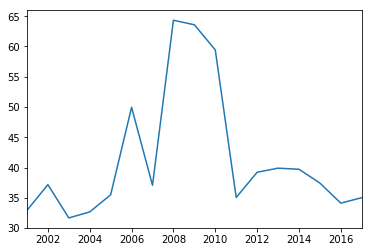

In [84]:
result.Utilities.plot()

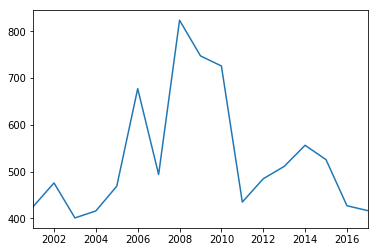

In [85]:
result.Wholesale.plot()

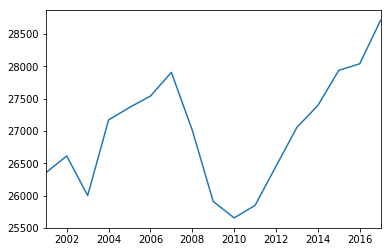

In [86]:
result.Total.plot()

### Estimate undisclosed for all counties

In [87]:
estimated_dfs = county_dfs.copy()

In [88]:
for key in estimated_dfs:
    print(key)
    estimates =  estimate_undisclosed(estimated_dfs[key], state_pc)
    estimated_dfs[key] = estimates



Alameda, CA
Alpine, CA
Amador, CA
Butte, CA
Calaveras, CA
Colusa, CA
Contra Costa, CA
Del Norte, CA
El Dorado, CA
Fresno, CA
Glenn, CA
Humboldt, CA
Imperial, CA
Inyo, CA
Kern, CA
Kings, CA
Lake, CA
Lassen, CA
Los Angeles, CA
Madera, CA
Marin, CA
Mariposa, CA
Mendocino, CA
Merced, CA
Modoc, CA
Mono, CA
Monterey, CA
Napa, CA
Nevada, CA
Orange, CA
Placer, CA
Plumas, CA
Riverside, CA
Sacramento, CA
San Benito, CA
San Bernardino, CA
San Diego, CA
San Francisco, CA
San Joaquin, CA
San Luis Obispo, CA
San Mateo, CA
Santa Barbara, CA
Santa Clara, CA
Santa Cruz, CA
Shasta, CA
Sierra, CA
Siskiyou, CA
Solano, CA
Sonoma, CA
Stanislaus, CA
Sutter, CA
Tehama, CA
Trinity, CA
Tulare, CA
Tuolumne, CA
Ventura, CA
Yolo, CA
Yuba, CA


In [89]:
estimated_dfs['Riverside, CA'].head()

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Health,Arts,Accommodation,Other,Federal,Military,State,Local,county,Total
2001,11989.0,8940.0,1080.0,1467.0,69788.0,54439.0,18509.0,81096.0,16223.0,8383.0,...,54916.0,15014.0,52408.0,44247.0,6126.0,3105.0,12128.0,81343.0,"Riverside, CA",670795
2002,13177.0,8346.0,1042.0,1696.0,71932.0,52978.0,20323.0,85825.0,16315.0,8343.0,...,58871.0,15994.0,54715.0,47422.0,6343.0,3222.0,13286.0,85224.0,"Riverside, CA",706085
2003,12842.0,8509.0,1167.0,1738.0,79433.0,53650.0,20716.0,90457.0,17104.0,8613.0,...,61174.0,15865.0,56387.0,49105.0,6405.0,3378.0,13096.0,87479.0,"Riverside, CA",742451
2004,10990.0,8158.0,972.0,1598.0,91156.0,58275.0,21518.0,98581.0,19555.0,9132.0,...,62215.0,16757.0,58835.0,51529.0,6653.0,3417.0,12364.0,89986.0,"Riverside, CA",792646
2005,9556.0,8169.0,1165.0,1881.0,101786.0,58845.0,23512.0,105635.0,21627.0,10049.0,...,63110.0,16946.0,63352.0,53696.0,6597.0,3333.0,12304.0,95942.0,"Riverside, CA",841274


## Measuring Regional Diversification

### Herfindahl–Hirschman Index

$$HHI_{r,t} = \sum_{i}s_{i,r,t}^2$$

with:

$$s_{i,r,t} =int(100 * e_{i,r,t} / \sum_i e_{i,r,t} )$$

HHI is an index of market *concentration*. In other words, a higher value of HHI points to more concentration of activity in a specific sectors and lower diversification, while a lower value of HHI points to lower concentration and more diversification.


In [90]:
e = np.array([10, 20, 5, 50, 65])
e.sum()

150

In [91]:
s = (100 * e / e.sum())
s

array([ 6.66666667, 13.33333333,  3.33333333, 33.33333333, 43.33333333])

In [92]:
s = np.rint(s).astype('i')

In [93]:
s

array([ 7, 13,  3, 33, 43], dtype=int32)

In [94]:
s.sum()


99

In [95]:
hhi_r = (s**2).sum()

In [96]:
hhi_r

3165

In [97]:
def hhi(e):
    s = 100 * e / e.sum()
    s = np.rint(s).astype('i')
    return (s**2).sum()


In [98]:
e = np.array([10, 20, 5, 50, 65])
hhi(e)

3165

In [99]:
e = np.array([10, 20, 35, 50, 35])
hhi(e)

2365


## Measuring diversification for each county

In [100]:
key

'Yuba, CA'

In [101]:
county = estimated_dfs[key]

In [102]:
county.head()

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Health,Arts,Accommodation,Other,Federal,Military,State,Local,county,Total
2001,1992.0,522.0,103.0,32.922365,1407.0,1285.0,425.077635,1985.0,501.0,243.0,...,2166.0,345.0,1132.0,1133.0,1289.0,3221.0,1773.0,3847.0,"Yuba, CA",26355
2002,1929.0,508.0,89.0,37.177653,1199.0,1349.0,475.822347,2062.0,506.0,186.0,...,2254.0,350.0,1199.0,1202.0,1321.0,3383.0,1855.0,3660.0,"Yuba, CA",26614
2003,1828.0,443.0,93.0,31.677392,1354.0,1367.0,401.083433,1889.0,552.0,183.0,...,2221.0,294.0,1196.0,1207.0,1296.0,3407.0,1763.0,3634.0,"Yuba, CA",26002
2004,1735.0,506.0,89.0,32.667545,1631.0,1381.0,416.010719,2104.0,568.0,252.0,...,2112.0,297.0,1242.0,1230.0,1376.0,3526.0,1660.0,3947.0,"Yuba, CA",27171
2005,1424.0,474.0,99.0,35.499893,1646.0,1100.0,468.859495,2243.0,671.0,268.0,...,2195.0,324.0,1253.0,1250.0,1411.0,3448.0,1631.0,3969.0,"Yuba, CA",27364


In [103]:
e = county[description].values

In [104]:
e.shape

(17, 24)

In [105]:
hhivalues = []
for e_t in e:
    print(hhi(e_t))
    hhivalues.append(hhi(e_t))

771
770
766
778
763
671
748
720
764
747
793
820
863
828
797
762
808


In [106]:
len(hhivalues)

17

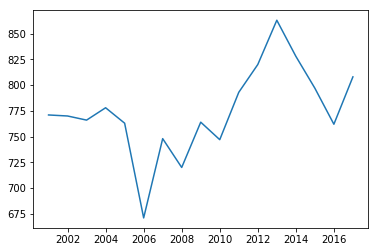

In [107]:
years = np.arange(2001, 2018)
plt.plot(years, hhivalues)

In [108]:
hhi_counties = []
for county in estimated_dfs.keys():
    e = estimated_dfs[county][description].values
    hhivalues = []
    for e_t in e:
        hhivalues.append(hhi(e_t))
    hhi_counties.append(hhivalues)
hhi_counties = np.array(hhi_counties).T

In [109]:
hhi_counties.shape

(17, 58)

In [110]:
hh_df = pandas.DataFrame(data = hhi_counties, columns=estimated_dfs.keys())

In [111]:
hh_df.head()

,"Alameda, CA","Alpine, CA","Amador, CA","Butte, CA","Calaveras, CA","Colusa, CA","Contra Costa, CA","Del Norte, CA","El Dorado, CA","Fresno, CA",...,"Sonoma, CA","Stanislaus, CA","Sutter, CA","Tehama, CA","Trinity, CA","Tulare, CA","Tuolumne, CA","Ventura, CA","Yolo, CA","Yuba, CA"
0,669,755,825,766,822,1223,671,957,774,635,...,696,783,753,808,1042,765,772,662,703,771
1,661,1987,783,767,823,1295,682,977,783,633,...,700,783,767,830,1001,810,745,643,701,770
2,654,908,829,797,833,1237,701,1024,778,644,...,664,760,795,844,998,848,791,637,688,766
3,628,1880,900,779,846,1142,686,998,771,640,...,703,731,788,855,987,805,777,640,697,778
4,628,1003,849,792,871,1055,697,1002,790,650,...,687,725,797,810,871,788,796,627,686,763


In [112]:
hh_df.columns = [key.split(",")[0] for key in estimated_dfs.keys()]
hh_df.head()

,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,Del Norte,El Dorado,Fresno,...,Sonoma,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba
0,669,755,825,766,822,1223,671,957,774,635,...,696,783,753,808,1042,765,772,662,703,771
1,661,1987,783,767,823,1295,682,977,783,633,...,700,783,767,830,1001,810,745,643,701,770
2,654,908,829,797,833,1237,701,1024,778,644,...,664,760,795,844,998,848,791,637,688,766
3,628,1880,900,779,846,1142,686,998,771,640,...,703,731,788,855,987,805,777,640,697,778
4,628,1003,849,792,871,1055,697,1002,790,650,...,687,725,797,810,871,788,796,627,686,763


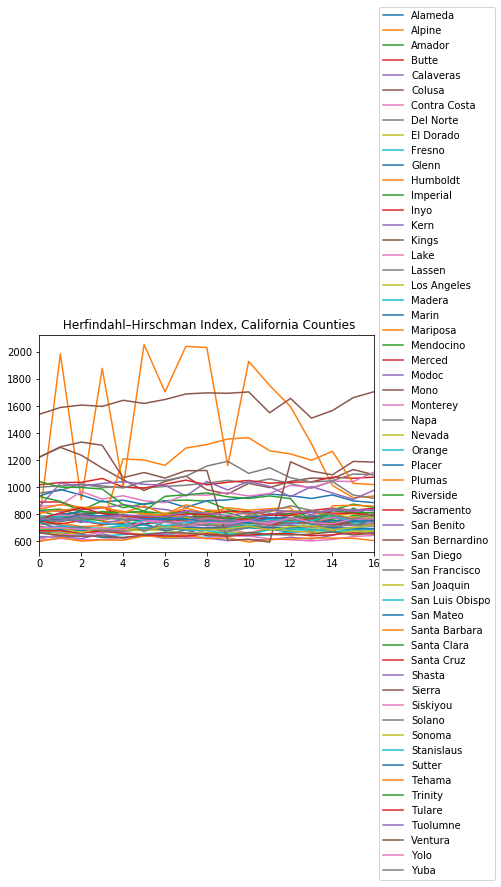

In [113]:
f = plt.figure()

plt.title(' Herfindahl–Hirschman Index, California Counties', color='black')
hh_df.plot(ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

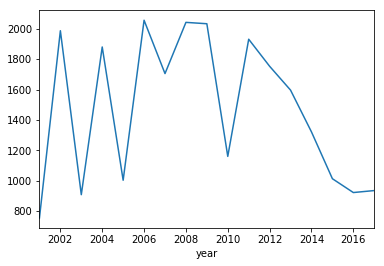

In [114]:
years = range(2001, 2018)
hh_df['year'] = years
hh_df.set_index('year', inplace=True)
hh_df.Alpine.plot()

### Volatility

>The    shares    of    volatile    (SVOL)    and    nonvolatile    (SNONVOL)  industries  are  calculated  as  follows.  First,  national-level  data  on  wage  and  salary  employment  in  20  U.S. Bureau of Economic Analysis–reported NAICS sectors for 2000 to 2013 were gathered. Second, the mean and stan-dard  deviation  of  2000-2013  annual  employment  in  each  sector was calculated. Third, coefficients of variation (standard  deviation  divided  by  mean)  were  calculated  for  each  industry. Finally, industries were sorted by their employment coefficients of variation.

In [115]:
us = pandas.read_csv('CAEMP25N_US_2001_2017.csv', skipfooter=4)


/home/serge/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [116]:
us = us[us.GeoName=='United States']

In [117]:
us4d = us[us.LineCode.isin(d4)]
us4d.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
5,"""00000""",United States,,CAEMP25N,70,111-112,Farm employment,Number of jobs,3063000,2904000,...,2629000,2624000,2636000,2639000,2623000,2645000,2645000,2649000,2643000,2631000
8,"""00000""",United States,,CAEMP25N,100,113-115,"Forestry, fishing, and related activities",Number of jobs,801500,842700,...,861200,832400,852400,856600,885400,909100,941000,915900,935200,926400
9,"""00000""",United States,,CAEMP25N,200,21,"Mining, quarrying, and oil and gas extraction",Number of jobs,808400,748000,...,1213200,1126600,1269000,1244000,1551200,1607000,1597500,1553300,1452200,1511100
10,"""00000""",United States,,CAEMP25N,300,22,Utilities,Number of jobs,615800,599600,...,597300,589800,582200,575500,577600,578300,580600,597400,622000,663500
11,"""00000""",United States,,CAEMP25N,400,23,Construction,Number of jobs,9816700,9668800,...,10769800,9424900,8770700,8744800,8933800,9237800,9564300,9844900,10322100,10634600


In [118]:
us4d.iloc[:,8:]

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
5,3063000,2904000,2838000,2719000,2656000,2579000,2665000,2629000,2624000,2636000,2639000,2623000,2645000,2645000,2649000,2643000,2631000
8,801500,842700,785300,811500,829400,825500,846600,861200,832400,852400,856600,885400,909100,941000,915900,935200,926400
9,808400,748000,800200,779400,833600,930200,1012300,1213200,1126600,1269000,1244000,1551200,1607000,1597500,1553300,1452200,1511100
10,615800,599600,583200,575400,569900,570700,580600,597300,589800,582200,575500,577600,578300,580600,597400,622000,663500
11,9816700,9668800,9900300,10337600,10965800,11413900,11400000,10769800,9424900,8770700,8744800,8933800,9237800,9564300,9844900,10322100,10634600
12,16921600,15745700,14975000,14790900,14724200,14675200,14460800,13971300,12478200,12092900,12376700,12596200,12761200,12908600,13076600,13131900,13304800
13,6233400,6100800,6063500,6183500,6334500,6481800,6573600,6516600,6130300,6020000,6154300,6240500,6343100,6720600,6819100,6464400,6478900
14,18257800,18187100,18219100,18359500,18665800,18802800,18968300,18539900,17796700,17571600,17927300,18073800,18369100,18713100,19095300,19199500,19222200
15,5480000,5355300,5308500,5415800,5602300,5743900,5927900,5819600,5533200,5466200,5670800,5866400,6012800,6282400,6929700,7413200,7663800
16,4047800,3715200,3589400,3553100,3562700,3545500,3555900,3510400,3310300,3222600,3229000,3224700,3264600,3327000,3316400,3384900,3384400


In [119]:
us_means = us4d.iloc[:,8:].mean(axis=1)
us_means

5      2700250.0
8       817225.0
9       880525.0
10      577475.0
11    10762950.0
12    14725475.0
13     6325600.0
14    18587425.0
15     5599025.0
16     3560975.0
17     8279725.0
18     6929950.0
19    11046025.0
20     1863050.0
21    10444350.0
22     3517350.0
23    17017975.0
24     3481250.0
25    11697175.0
26     9827350.0
28     2795000.0
29     2068500.0
31     5154500.0
32    13884250.0
dtype: float64

In [120]:
us_stds = us4d.iloc[:,8:].std(axis=1)
us_stds

5     108429.316454
8      25712.172863
9     110318.670979
10      5560.200836
11    764778.017902
12    215347.461482
13    241378.858505
14    355464.610287
15    287009.702217
16     19452.741880
17    385137.355368
18    812831.682043
19    725399.555992
20     89415.975456
21    592571.449982
22    212318.416535
23    821247.520037
24    182349.527008
25    499389.910291
26    278208.764540
28     18402.898322
29     33758.949431
31     65056.385800
32    239498.608208
dtype: float64

In [121]:
us_cvs = us_stds/us_means
us_cvs

5     0.040155
8     0.031463
9     0.125287
10    0.009628
11    0.071057
12    0.014624
13    0.038159
14    0.019124
15    0.051261
16    0.005463
17    0.046516
18    0.117293
19    0.065671
20    0.047994
21    0.056736
22    0.060363
23    0.048258
24    0.052380
25    0.042693
26    0.028310
28    0.006584
29    0.016320
31    0.012621
32    0.017250
dtype: float64

In [122]:
# 5 most and lest volatile -> create a dataframe
usvol = pandas.DataFrame(data = us_cvs, columns=['CV'])
usvol

,CV
5,0.040155
8,0.031463
9,0.125287
10,0.009628
11,0.071057
12,0.014624
13,0.038159
14,0.019124
15,0.051261
16,0.005463


In [123]:
# 5 most volatile -> largests cvs
usvol.sort_values(by='CV', ascending=False)[:5]

,CV
9,0.125287
18,0.117293
11,0.071057
19,0.065671
22,0.060363


In [124]:
# 5 most volatile -> largests cvs
hivolidx = usvol.sort_values(by='CV', ascending=False)[:5].index
us4d.loc[hivolidx]

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
9,"""00000""",United States,,CAEMP25N,200,21,"Mining, quarrying, and oil and gas extraction",Number of jobs,808400,748000,...,1213200,1126600,1269000,1244000,1551200,1607000,1597500,1553300,1452200,1511100
18,"""00000""",United States,,CAEMP25N,1100,53,Real estate and rental and leasing,Number of jobs,5548400,5674000,...,7682200,7504200,7691000,7928300,7856200,8056800,8405800,8668300,8868200,9105900
11,"""00000""",United States,,CAEMP25N,400,23,Construction,Number of jobs,9816700,9668800,...,10769800,9424900,8770700,8744800,8933800,9237800,9564300,9844900,10322100,10634600
19,"""00000""",United States,,CAEMP25N,1200,54,"Professional, scientific, and technical ser...",Number of jobs,10271800,10163200,...,12117900,11720800,11753800,11961100,12212200,12544300,12864700,13333200,13496900,13721000
22,"""00000""",United States,,CAEMP25N,1500,61,Educational services,Number of jobs,3011300,3176600,...,3848300,3976200,4095900,4128600,4206200,4339100,4498100,4610900,4641800,4691200


In [125]:
# 5 least volatile -> lowest cvs
usvol.sort_values(by='CV')[:5]

,CV
16,0.005463
28,0.006584
10,0.009628
31,0.012621
12,0.014624


In [126]:
lowvolidx = usvol.sort_values(by='CV')[:5].index
us4d.loc[lowvolidx]

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
16,"""00000""",United States,,CAEMP25N,900,51,Information,Number of jobs,4047800,3715200,...,3510400,3310300,3222600,3229000,3224700,3264600,3327000,3316400,3384900,3384400
28,"""00000""",United States,,CAEMP25N,2001,...,Federal civilian,Number of jobs,2729000,2816000,...,2817000,2884000,3035000,2917000,2875000,2826000,2792000,2810000,2847000,2857000
10,"""00000""",United States,,CAEMP25N,300,22,Utilities,Number of jobs,615800,599600,...,597300,589800,582200,575500,577600,578300,580600,597400,622000,663500
31,"""00000""",United States,,CAEMP25N,2011,...,State government,Number of jobs,5031000,5085000,...,5317000,5346000,5338000,5312000,5299000,5306000,5330000,5349000,5351000,5365000
12,"""00000""",United States,,CAEMP25N,500,31-33,Manufacturing,Number of jobs,16921600,15745700,...,13971300,12478200,12092900,12376700,12596200,12761200,12908600,13076600,13131900,13304800


In [127]:
lowvolidx

Int64Index([16, 28, 10, 31, 12], dtype='int64')


## Get percentage of low and high volatility sectors for each county

In [128]:
description

['Farm',
 'Forestry',
 'Mining',
 'Utilities',
 'Construction',
 'Manufacturing',
 'Wholesale',
 'Retail',
 'Transportation',
 'Information',
 'Finance',
 'Real',
 'Professional',
 'Management',
 'Administrative',
 'Educational',
 'Health',
 'Arts',
 'Accommodation',
 'Other',
 'Federal',
 'Military',
 'State',
 'Local']

In [129]:
us_desc = us4d.Description
low_desc = us_desc[lowvolidx]
high_desc = us_desc[hivolidx]
low_desc

16             Information
28        Federal civilian
10               Utilities
31        State government
12           Manufacturing
Name: Description, dtype: object

In [130]:
description

['Farm',
 'Forestry',
 'Mining',
 'Utilities',
 'Construction',
 'Manufacturing',
 'Wholesale',
 'Retail',
 'Transportation',
 'Information',
 'Finance',
 'Real',
 'Professional',
 'Management',
 'Administrative',
 'Educational',
 'Health',
 'Arts',
 'Accommodation',
 'Other',
 'Federal',
 'Military',
 'State',
 'Local']

In [131]:
#d.strip().split()[0].replace(",","") for d in description
desc_low = [ desc for desc in description if desc in [ld.strip().split()[0].replace(",","") for ld in low_desc]]
desc_low

['Utilities', 'Manufacturing', 'Information', 'Federal', 'State']

In [132]:
desc_high = [ desc for desc in description if desc in [hd.strip().split()[0].replace(",","") for hd in high_desc]]
desc_high

['Mining', 'Construction', 'Real', 'Professional', 'Educational']

In [133]:
county_df = estimated_dfs['Alpine, CA']

In [134]:
county_low = county_df[desc_low]

In [135]:
county_df['lowvol']=county_low.astype('float').sum(axis=1) / county_df.Total.astype('float')

In [136]:
county_df

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Arts,Accommodation,Other,Federal,Military,State,Local,county,Total,lowvol
2001,0.0,7.000000,0.0,4.719870,89.046981,17.000000,60.940680,92.000000,48.186669,52.709449,...,38.375530,104.490403,43.000000,16.0,2.0,39.077451,140.390366,"Alpine, CA",1179,0.109845
2002,0.0,6.000000,0.0,12.000000,57.000000,18.000000,27.300694,83.000000,21.239149,5.000000,...,160.000000,470.000000,43.000000,14.0,2.0,18.112229,65.373023,"Alpine, CA",1161,0.057806
2003,0.0,5.000000,0.0,17.000000,93.909628,139.510522,5.000000,33.000000,0.000000,4.000000,...,41.243247,110.713635,101.681337,12.0,2.0,41.355623,147.500678,"Alpine, CA",1128,0.189598
2004,0.0,12.085046,0.0,13.000000,73.973215,13.000000,6.000000,30.000000,0.000000,6.000000,...,30.888342,434.000000,46.000000,12.0,2.0,29.881608,107.416302,"Alpine, CA",1109,0.066620
2005,0.0,8.000000,0.0,4.784050,70.000000,13.000000,6.000000,171.808049,0.000000,9.000000,...,41.014907,111.657689,100.309338,11.0,2.0,38.698622,141.940543,"Alpine, CA",1126,0.067924
2006,0.0,8.000000,0.0,2.565765,64.000000,18.000000,6.000000,92.453136,0.000000,7.000000,...,154.000000,454.000000,54.117073,10.0,2.0,21.027739,76.216588,"Alpine, CA",1137,0.051533
2007,0.0,7.000000,0.0,2.435005,50.169053,16.000000,7.000000,85.235275,0.000000,6.000000,...,150.000000,406.000000,50.934777,11.0,2.0,19.851934,71.103302,"Alpine, CA",1141,0.048455
2008,0.0,7.000000,0.0,1.077995,69.000000,12.000000,6.000000,35.606230,0.000000,7.000000,...,148.000000,354.000000,21.623831,12.0,2.0,0.000000,283.000000,"Alpine, CA",1069,0.030007
2009,0.0,6.000000,0.0,0.958033,51.000000,16.000000,6.000000,29.461770,0.000000,7.000000,...,139.000000,309.000000,35.000000,11.0,2.0,0.000000,259.000000,"Alpine, CA",961,0.036377
2010,0.0,9.000000,0.0,3.210062,43.000000,17.000000,39.194410,29.000000,0.000000,7.000000,...,29.161593,74.129461,63.113470,9.0,2.0,0.000000,253.000000,"Alpine, CA",970,0.037330


In [137]:
county_df['hivol']=county_df[desc_high].astype('float').sum(axis=1) / county_df.Total.astype('float')

In [138]:
county_df.head()


,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,Accommodation,Other,Federal,Military,State,Local,county,Total,lowvol,hivol
2001,0.0,7.000000,0.0,4.71987,89.046981,17.000000,60.940680,92.000000,48.186669,52.709449,...,104.490403,43.000000,16.0,2.0,39.077451,140.390366,"Alpine, CA",1179,0.109845,0.261268
2002,0.0,6.000000,0.0,12.00000,57.000000,18.000000,27.300694,83.000000,21.239149,5.000000,...,470.000000,43.000000,14.0,2.0,18.112229,65.373023,"Alpine, CA",1161,0.057806,0.100620
2003,0.0,5.000000,0.0,17.00000,93.909628,139.510522,5.000000,33.000000,0.000000,4.000000,...,110.713635,101.681337,12.0,2.0,41.355623,147.500678,"Alpine, CA",1128,0.189598,0.188119
2004,0.0,12.085046,0.0,13.00000,73.973215,13.000000,6.000000,30.000000,0.000000,6.000000,...,434.000000,46.000000,12.0,2.0,29.881608,107.416302,"Alpine, CA",1109,0.066620,0.154187
2005,0.0,8.000000,0.0,4.78405,70.000000,13.000000,6.000000,171.808049,0.000000,9.000000,...,111.657689,100.309338,11.0,2.0,38.698622,141.940543,"Alpine, CA",1126,0.067924,0.282781


In [139]:
county_df.columns

Index(['Farm', 'Forestry', 'Mining', 'Utilities', 'Construction',
       'Manufacturing', 'Wholesale', 'Retail', 'Transportation', 'Information',
       'Finance', 'Real', 'Professional', 'Management', 'Administrative',
       'Educational', 'Health', 'Arts', 'Accommodation', 'Other', 'Federal',
       'Military', 'State', 'Local', 'county', 'Total', 'lowvol', 'hivol'],
      dtype='object')

## Econometric Analysis of Growth vs. Concentration and Volatility

$$g_{r,t} = \beta_0 + \beta_1 HHI_{r,t-1} + \beta_2 LVOL_{r,t-1} + \beta_3 HVOL_{r,t-1} + \epsilon_{r,t} $$

In [140]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [141]:
county_df['lowvol_lag'] = county_df['lowvol'].shift(1)
county_df['hivol_lag'] = county_df['hivol'].shift(1)

In [142]:
county_df.lowvol_lag

2001         NaN
2002    0.109845
2003    0.057806
2004    0.189598
2005    0.066620
2006    0.067924
2007    0.051533
2008    0.048455
2009    0.030007
2010    0.036377
2011    0.037330
2012    0.033892
2013    0.033144
2014    0.027282
2015    0.038340
2016    0.132263
2017    0.197349
Name: lowvol_lag, dtype: float64

In [143]:
county_df.total_lag = county_df.Total.shift(1)

/home/serge/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [144]:
county_df['gr'] = (county_df.Total - county_df.total_lag)/ county_df.total_lag * 100

In [145]:
county_df.gr

2001         NaN
2002    -1.52672
2003    -2.84238
2004     -1.6844
2005     1.53291
2006    0.976909
2007    0.351803
2008    -6.31025
2009    -10.1029
2010    0.936524
2011     7.83505
2012    -3.05927
2013     4.43787
2014     23.0406
2015     2.30238
2016   -0.375094
2017    -8.58434
Name: gr, dtype: object

In [146]:
county_df.columns

Index(['Farm', 'Forestry', 'Mining', 'Utilities', 'Construction',
       'Manufacturing', 'Wholesale', 'Retail', 'Transportation', 'Information',
       'Finance', 'Real', 'Professional', 'Management', 'Administrative',
       'Educational', 'Health', 'Arts', 'Accommodation', 'Other', 'Federal',
       'Military', 'State', 'Local', 'county', 'Total', 'lowvol', 'hivol',
       'lowvol_lag', 'hivol_lag', 'gr'],
      dtype='object')

In [147]:
county_df.lowvol_lag

2001         NaN
2002    0.109845
2003    0.057806
2004    0.189598
2005    0.066620
2006    0.067924
2007    0.051533
2008    0.048455
2009    0.030007
2010    0.036377
2011    0.037330
2012    0.033892
2013    0.033144
2014    0.027282
2015    0.038340
2016    0.132263
2017    0.197349
Name: lowvol_lag, dtype: float64

In [148]:
reg_df = county_df[['gr', 'lowvol_lag', 'hivol_lag']]
reg_df = reg_df.iloc[1:,:]
for column in reg_df.columns:
    reg_df[column] = reg_df[column].astype('float')

In [149]:
reg_df.columns

Index(['gr', 'lowvol_lag', 'hivol_lag'], dtype='object')

In [150]:
model_1 = ols("gr ~ lowvol_lag + hivol_lag", data=reg_df).fit()

In [151]:
model_1.summary()

/home/serge/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     gr   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.061
Date:                Tue, 14 May 2019   Prob (F-statistic):              0.374
Time:                        22:13:56   Log-Likelihood:                -53.339
No. Observations:                  16   AIC:                             112.7
Df Residuals:                      13   BIC:                             115.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8023      5.551      0.325      0.751     -10.189      13.794
lowvol_lag   -58.7477     41.513     -1.415      0.181    -148.432      30.937
hivol_lag     17.6405     37.807      0.467      0.649     -64.037      99.318
==============================================================================
Omnibus:                       13.480   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               11.714
Skew:                           1.316   Prob(JB):                      0.00286
Kurtosis:                       6.262   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
hh_df.shape

(17, 58)

In [153]:
cleaned_dfs = {}
clean_vars = ['lowvol_lag', 'hivol_lag', 'gr', 'hh_lag', 'Total_lag', 'Total']
for county in estimated_dfs.keys():
    county_df = estimated_dfs[county]
    county_df['lowvol']=county_low.astype('float').sum(axis=1) / county_df.Total.astype('float')
    county_df['hivol']=county_df[desc_high].astype('float').sum(axis=1) / county_df.Total.astype('float')
    county_df['lowvol_lag'] = county_df['lowvol'].shift(1)
    county_df['hivol_lag'] = county_df['hivol'].shift(1)
    county_df['hh'] = hh_df[county.split(",")[0]]
    county_df['hh_lag'] = county_df['hh'].shift(1)
    county_df['Total_lag'] = county_df['Total'].shift(1)
    county_df['gr'] = 100 * (county_df.Total - county_df.Total_lag) / county_df.Total_lag
    for var in clean_vars:
        county_df[var] = county_df[var].astype('float')
    cleaned_dfs[county] = county_df

In [154]:
county_df.head()

,Farm,Forestry,Mining,Utilities,Construction,Manufacturing,Wholesale,Retail,Transportation,Information,...,county,Total,lowvol,hivol,lowvol_lag,hivol_lag,hh,hh_lag,Total_lag,gr
2001,1992.0,522.0,103.0,32.922365,1407.0,1285.0,425.077635,1985.0,501.0,243.0,...,"Yuba, CA",26355.0,0.004914,0.112275,NaN,NaN,771,NaN,NaN,NaN
2002,1929.0,508.0,89.0,37.177653,1199.0,1349.0,475.822347,2062.0,506.0,186.0,...,"Yuba, CA",26614.0,0.002522,0.103555,0.004914,0.112275,770,771.0,26355.0,0.982736
2003,1828.0,443.0,93.0,31.677392,1354.0,1367.0,401.083433,1889.0,552.0,183.0,...,"Yuba, CA",26002.0,0.008225,0.116914,0.002522,0.103555,766,770.0,26614.0,-2.299542
2004,1735.0,506.0,89.0,32.667545,1631.0,1381.0,416.010719,2104.0,568.0,252.0,...,"Yuba, CA",27171.0,0.002719,0.127636,0.008225,0.116914,778,766.0,26002.0,4.495808
2005,1424.0,474.0,99.0,35.499893,1646.0,1100.0,468.859495,2243.0,671.0,268.0,...,"Yuba, CA",27364.0,0.002795,0.139197,0.002719,0.127636,763,778.0,27171.0,0.710316


In [155]:
import seaborn as sns
sns.set(style="ticks")

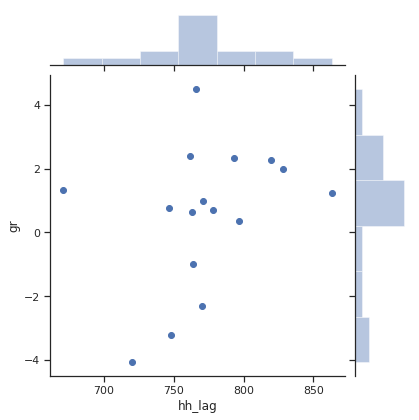

In [156]:
sns.jointplot(x='hh_lag', y='gr', data=county_df)

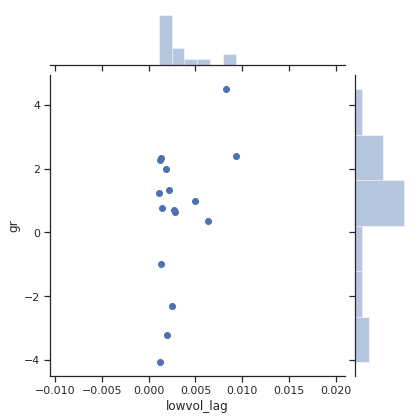

In [157]:
sns.jointplot(x='lowvol_lag', y='gr', data=county_df)

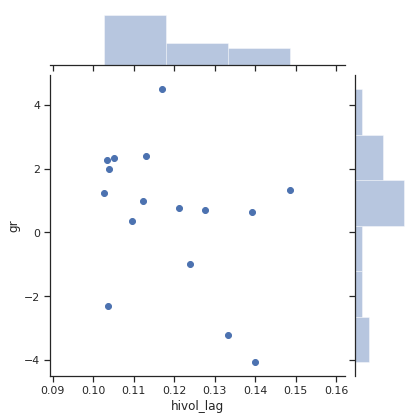

In [158]:
sns.jointplot(x='hivol_lag', y='gr', data=county_df)

In [159]:
model_1 = ols("gr ~ hh_lag + lowvol_lag + hivol_lag", data=county_df).fit()

In [160]:
model_1.summary()

/home/serge/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     gr   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     1.904
Date:                Tue, 14 May 2019   Prob (F-statistic):              0.183
Time:                        22:13:59   Log-Likelihood:                -31.898
No. Observations:                  16   AIC:                             71.80
Df Residuals:                      12   BIC:                             74.89
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.3185     24.277     -0.425      0.678     -63.213      42.576
hh_lag         0.0145      0.022      0.653      0.526      -0.034       0.063
lowvol_lag   379.8970    215.143      1.766      0.103     -88.860     848.654
hivol_lag    -12.5232     65.640     -0.191      0.852    -155.541     130.494
==============================================================================
Omnibus:                        0.991   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.609   Jarque-Bera (JB):                0.801
Skew:                          -0.257   Prob(JB):                        0.670
Kurtosis:                       2.032   Cond. No.                     3.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Pooling data across all counties

In [161]:
all_dfs = pandas.concat(cleaned_dfs.values())

/home/serge/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [162]:
all_dfs.shape

(986, 34)

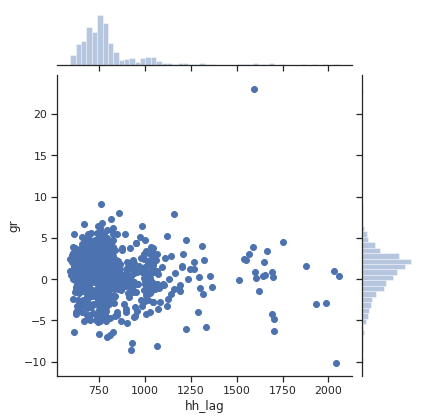

In [163]:
sns.jointplot(x='hh_lag', y='gr', data=all_dfs)

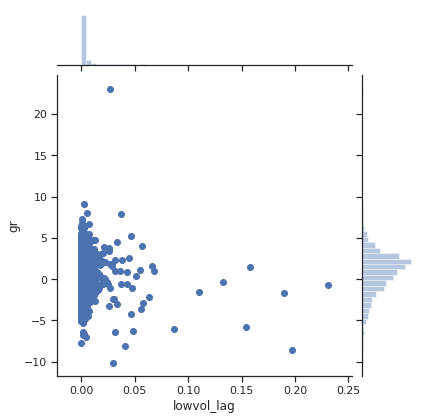

In [164]:
sns.jointplot(x='lowvol_lag', y='gr', data=all_dfs)

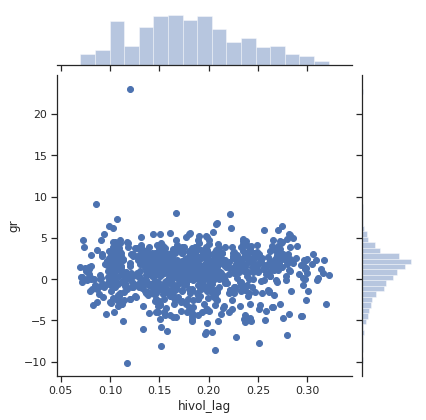

In [165]:
sns.jointplot(x='hivol_lag', y='gr', data=all_dfs)

In [166]:
model_1 = ols("gr ~ hh_lag + lowvol_lag + hivol_lag", data=all_dfs).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     gr   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     7.675
Date:                Tue, 14 May 2019   Prob (F-statistic):           4.54e-05
Time:                        22:14:04   Log-Likelihood:                -2186.7
No. Observations:                 928   AIC:                             4381.
Df Residuals:                     924   BIC:                             4401.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7498      0.530      3.304      0.001       0.710       2.789
hh_lag        -0.0008      0.000     -1.789      0.074      -0.002    8.04e-05
lowvol_lag   -18.2413      5.299     -3.443      0.001     -28.640      -7.842
hivol_lag     -0.4657      1.590     -0.293      0.770      -3.587       2.656
==============================================================================
Omnibus:                      160.604   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2138.498
Skew:                           0.325   Prob(JB):                         0.00
Kurtosis:                      10.408   Cond. No.                     5.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [167]:
model_2 = ols("gr ~ hh_lag + lowvol_lag + hivol_lag + Total_lag", data=all_dfs).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     gr   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.099
Date:                Tue, 14 May 2019   Prob (F-statistic):           7.60e-05
Time:                        22:14:04   Log-Likelihood:                -2186.0
No. Observations:                 928   AIC:                             4382.
Df Residuals:                     923   BIC:                             4406.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6819      0.533      3.158      0.002       0.637       2.727
hh_lag        -0.0007      0.000     -1.560      0.119      -0.002       0.000
lowvol_lag   -17.9980      5.302     -3.395      0.001     -28.403      -7.593
hivol_lag     -0.7732      1.612     -0.480      0.632      -3.936       2.390
Total_lag   1.257e-07   1.08e-07      1.168      0.243   -8.55e-08    3.37e-07
==============================================================================
Omnibus:                      159.939   Durbin-Watson:                   1.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2121.263
Skew:                           0.321   Prob(JB):                         0.00
Kurtosis:                      10.379   Cond. No.                     5.63e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [168]:
all_dfs.gr.mean()

0.8995542694050552

In [169]:
all_dfs.gr

2001          NaN
2002    -1.334475
2003     0.308747
2004     0.231502
2005     0.593608
2006     1.263560
2007     1.528067
2008    -0.736002
2009    -4.325804
2010    -1.223895
2011     1.409092
2012     4.230779
2013     3.386678
2014     3.937123
2015     4.562780
2016     2.691110
2017     2.395716
2001          NaN
2002    -1.526718
2003    -2.842377
2004    -1.684397
2005     1.532913
2006     0.976909
2007     0.351803
2008    -6.310254
2009   -10.102900
2010     0.936524
2011     7.835052
2012    -3.059273
2013     4.437870
          ...    
2005     3.683747
2006     0.464422
2007     2.425506
2008    -0.201214
2009    -3.033127
2010    -1.851453
2011    -0.269241
2012     2.649752
2013     3.308517
2014     2.506664
2015     3.551659
2016     2.255486
2017     1.148453
2001          NaN
2002     0.982736
2003    -2.299542
2004     4.495808
2005     0.710316
2006     0.643181
2007     1.328976
2008    -3.207196
2009    -4.072415
2010    -0.980279
2011     0.756129
2012     2